In [4]:
#Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [5]:
#Read the dataset 
iris=pd.read_csv("iris.csv")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X=iris.iloc[:,:4]

In [7]:
y=iris.iloc[:,-1]

In [8]:
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)
y_test.shape

(30,)

In [10]:
knnmodel=KNeighborsClassifier(n_neighbors=1)

In [11]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
# checking the train models accuracy with various k values
train=knnmodel.predict(X_train)
from sklearn.metrics import accuracy_score
ab=accuracy_score(train,y_train)
Ks=50
acc=np.zeros(Ks)

for i in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    yhat=neigh.predict(X_train)
    acc[i-1]=(accuracy_score(y_train,yhat))
acc
best_k=[]
for i,k in enumerate(acc):
    if k==acc.max():
         best_k.append(i+1)
best_k

[1]

In [13]:
y_predict1=knnmodel.predict(X_test)
y_predict1

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
from sklearn.metrics import accuracy_score

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict1)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [16]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,13,0
virginica,0,0,6


In [17]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])
prediction_output


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
y_test,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica
y_predict1,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-versicolor,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-setosa,Iris-setosa,Iris-versicolor,Iris-virginica


In [18]:
prediction_output.transpose()

,y_test,y_predict1
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [19]:
prediction_output.iloc[0,:].value_counts()

y_test
Iris-versicolor    13
Iris-setosa        11
Iris-virginica      6
Name: count, dtype: int64

In [20]:
mean_acc=np.zeros((Ks))
accuracy=[]


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)
for i,k in enumerate(mean_acc):
    if float(k)==mean_acc.max():
         accuracy.append(i+1)

In [41]:
print(mean_acc)
print(accuracy)


[1.         1.         1.         1.         0.96666667 1.
 0.96666667 1.         1.         1.         1.         1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.93333333 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.9        0.9        0.9        0.9        0.9        0.9
 0.86666667 0.        ]
[1, 2, 3, 4, 6, 8, 9, 10, 11, 12]


In [22]:
print( "The best accuracy was with", mean_acc.max(), "with k="+str((accuracy)))

The best accuracy was with 1.0 with k=[1, 2, 3, 4, 6, 8, 9, 10, 11, 12]


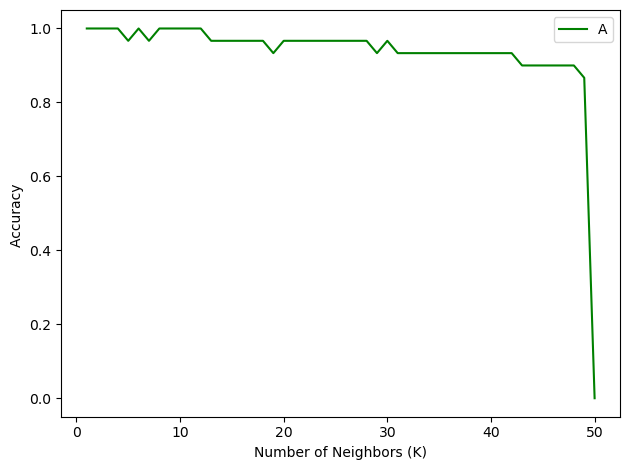

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks+1),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()